# 1- Kruskal Algorithm


Kruskal's algorithm is a greedy algorithm that finds a minimum spanning tree for a connected weighted graph. It finds a subset of the edges that forms a tree that includes every vertex, where the total weight of all the edges in the tree is minimized. If the graph is not connected, then it finds a minimum spanning forest (a minimum spanning tree for each connected component).

<!-- center -->
<p align="center">
  <img src="./KruskalDemo.gif">
</p>


In [14]:
# display graph using matplotlib
import matplotlib.pyplot as plt
import networkx as nx

def display_graph(graph):
    G = nx.Graph()
    for edge in graph:
        G.add_edge(edge[0], edge[1], weight=edge[2])
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    nx.draw(G, pos, with_labels=True, node_size=10, node_color="skyblue", node_shape="s", alpha=0.5, linewidths=40)
    plt.show()

Minimum Spanning Tree:  [('A', 'D', 5), ('C', 'E', 5), ('D', 'F', 6), ('A', 'B', 7), ('B', 'E', 7), ('E', 'G', 9)]


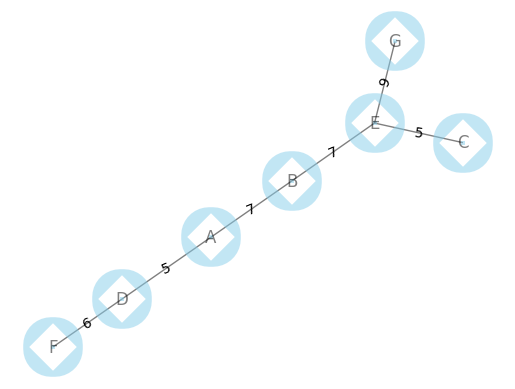

In [15]:

class DisjointSet:
    def __init__(self, vertices):
        self.vertices = vertices
        self.parent = {}
        for v in vertices:
            self.parent[v] = v
        self.rank = dict.fromkeys(vertices, 0)

    def find(self, item):
        if self.parent[item] == item:
            return item
        else:
            return self.find(self.parent[item])

    def union(self, x, y):
        xroot = self.find(x)
        yroot = self.find(y)
        if self.rank[xroot] < self.rank[yroot]:
            self.parent[xroot] = yroot
        elif self.rank[xroot] > self.rank[yroot]:
            self.parent[yroot] = xroot
        else :
            self.parent[yroot] = xroot
            self.rank[xroot] += 1

def kruskal(nodes, edges):
    forest = DisjointSet(nodes)
    mst = []
    edges = sorted(edges, key=lambda item: item[2])
    for edge in edges:
        node1, node2, _ = edge
        parent1 = forest.find(node1)
        parent2 = forest.find(node2)
        if parent1 != parent2:
            mst.append(edge)
            forest.union(parent1, parent2)
    return mst

def main():
    nodes = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
    edges = [('A', 'D', 5), ('C', 'E', 5), ('D', 'F', 6), ('A', 'B', 7), ('B', 'E', 7), ('B', 'C', 8), ('E', 'F', 8), ('B', 'D', 9), ('E', 'G', 9), ('F', 'G', 11), ('D', 'E', 15)]
    print("Minimum Spanning Tree: ", kruskal(nodes, edges))
    display_graph(kruskal(nodes, edges))

main()


# 2- Prim Algorithm


Prim's algorithm is a greedy algorithm that finds a minimum spanning tree for a connected weighted graph. It finds a subset of the edges that forms a tree that includes every vertex, where the total weight of all the edges in the tree is minimized. The algorithm operates by building this tree one vertex at a time, from an arbitrary starting vertex, at each step adding the cheapest possible connection from the tree to another vertex.

<!-- center -->
<p align="center">
  <img src="./PrimAlgDemo.gif">
</p>


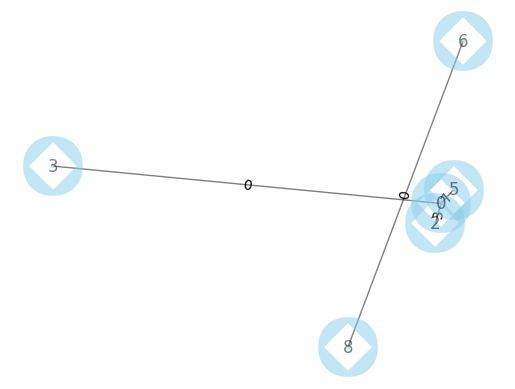

Edge 	Weight
0 - 1 	 2
1 - 2 	 3
0 - 3 	 6
1 - 4 	 5


In [17]:
import sys

class Graph:
    def __init__(self, vertices):
        self.V = vertices
        self.graph = [[0 for column in range(vertices)] for row in range(vertices)]

    def printMST(self, parent):
        print("Edge \tWeight")
        for i in range(1, self.V):
            print(parent[i], "-", i, "\t", self.graph[i][parent[i]])

    def minKey(self, key, mstSet):
        min_val = sys.maxsize
        for v in range(self.V):
            if key[v] < min_val and mstSet[v] == False:
                min_val = key[v]
                min_index = v
        return min_index

    def primMST(self):
        key = [sys.maxsize] * self.V
        parent = [None] * self.V
        key[0] = 0
        mstSet = [False] * self.V
        parent[0] = -1
        for cout in range(self.V):
            u = self.minKey(key, mstSet)
            mstSet[u] = True
            for v in range(self.V):
                if self.graph[u][v] > 0 and mstSet[v] == False and key[v] > self.graph[u][v]:
                    key[v] = self.graph[u][v]
                    parent[v] = u
        self.printMST(parent)

def main():
    g = Graph(5)
    g.graph = [[0, 2, 0, 6, 0],
               [2, 0, 3, 8, 5],
               [0, 3, 0, 0, 7],
               [6, 8, 0, 0, 9],
               [0, 5, 7, 9, 0]]
    # display the graph
    display_graph(g.graph)
    g.primMST()

main()


    


# 3- Bellman Algorithm

<!-- not bellman ford -->

<!-- prancipe de relachment  -->
<!-- tri topologique -->

The Bellman algorithm is an algorithm that finds the shortest path between a source vertex and all other vertices in a weighted graph. It is a graph search algorithm that solves the single-source shortest path problem for a weighted graph. For the case in which the graph contains a cycle of negative weight, the algorithm can detect it. The algorithm can use the concept of relaxation, which is a technique used to improve the solution of a problem until it becomes optimal. The algorithm can also use the topological sorting of a graph to improve its performance.


### 3.1 principle de relachement

The principle of relaxation is a technique used to improve the solution of a problem until it becomes optimal. The technique is used in the Bellman algorithm to find the shortest path between a source vertex and all other vertices in a weighted graph. The algorithm uses the principle of relaxation to improve the solution of the problem by updating the shortest path between two vertices if a shorter path is found. The algorithm continues to update the shortest path until it becomes optimal.


### 3.2 Tri topologique with example

Topological sorting is a linear ordering of the vertices of a directed graph such that for every directed edge uv from vertex u to vertex v, u comes before v in the ordering. The topological sorting of a graph is not unique. The topological sorting of a graph is used to find the shortest path between a source vertex and all other vertices in a weighted graph. The topological sorting of a graph can be used to improve the performance of the Bellman algorithm.

example:


In [26]:
from collections import deque, defaultdict

def topological_sort(graph):
    # Create a set of all nodes with no incoming edge
    in_degree = {u: 0 for u in graph} 
    for u in graph: 
        for v in graph[u]:
            in_degree[v] += 1

    # Use deque as we can achieve O(1) complexity for appendleft() and popleft()
    queue = deque([u for u in in_degree if in_degree[u] == 0]) 

    L = [] 
    while queue: 
        u = queue.popleft() 
        L.append(u) 
        for v in graph[u]: 
            in_degree[v] -= 1
            if in_degree[v] == 0: 
                queue.append(v) 

    if len(L) == len(graph):
        return L  
    else:  
        return []  # Return an empty list to indicate that graph has at least one cycle

# test the topological sort function
graph = {'C': {'A','E','B'},'D': {'C', 'A'}, 'A': {'B','E'},'E':{},'B':{}}
print("Topological Sort: ", topological_sort(graph))
# a more complex graph with 10 nodes




Topological Sort:  ['D', 'C', 'A', 'E', 'B']


### 3.3 Example of Bellman Algorithm


In [28]:
def bellman(graph, start):
    distance, predecessor = dict(), dict()
    for node in graph:
        distance[node], predecessor[node] = float('inf'), None
    distance[start] = 0

    for node in topological_sort(graph):
        for neighbour in graph[node]:
            if distance[neighbour] > distance[node] + graph[node][neighbour]:
                distance[neighbour], predecessor[neighbour] = distance[node] + graph[node][neighbour], node

    return distance, predecessor

# test the bellman function
graph = {
    'D': {'C': 4, 'A':  3},
    'C': {'E':  -1, 'B':  2, 'A':  -4},
    'A': {'E':1,'B':-2},
    'B': {},
    'E': {}
}
print("Bellman Algorithm: ", bellman(graph, 'D'))


Bellman Algorithm:  ({'D': 0, 'C': 4, 'A': 0, 'B': -2, 'E': 1}, {'D': None, 'C': 'D', 'A': 'C', 'B': 'A', 'E': 'A'})
